In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score
import pickle

# Data Loading

In [7]:
# Loading the Data
df = pd.read_csv("hand_landmarks_data.csv")

In [8]:
# Making sure the data is successfully loaded
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


# Data Exploration

In [9]:
# Understanding the nature of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [10]:
# Checking if the data contains nulls
df.isna().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

## since there are 0 missing values
## then no need to drop cols

In [11]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [12]:
# Checking if blanced dataaa
df['label'].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

# Data Visualization

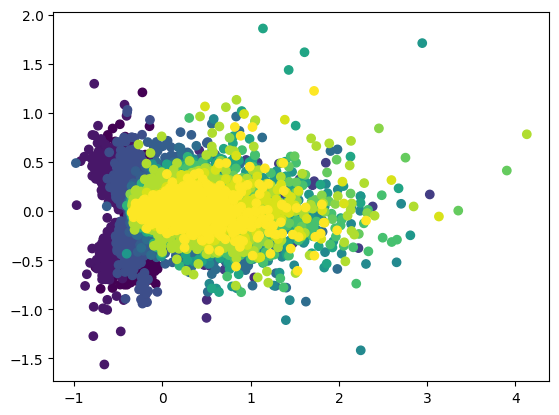

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)
plt.scatter(components[:, 0], components[:, 1], c=y, cmap='viridis')

C:\Users\hp\AppData\Local\Temp\ipykernel_9420\1900829240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")


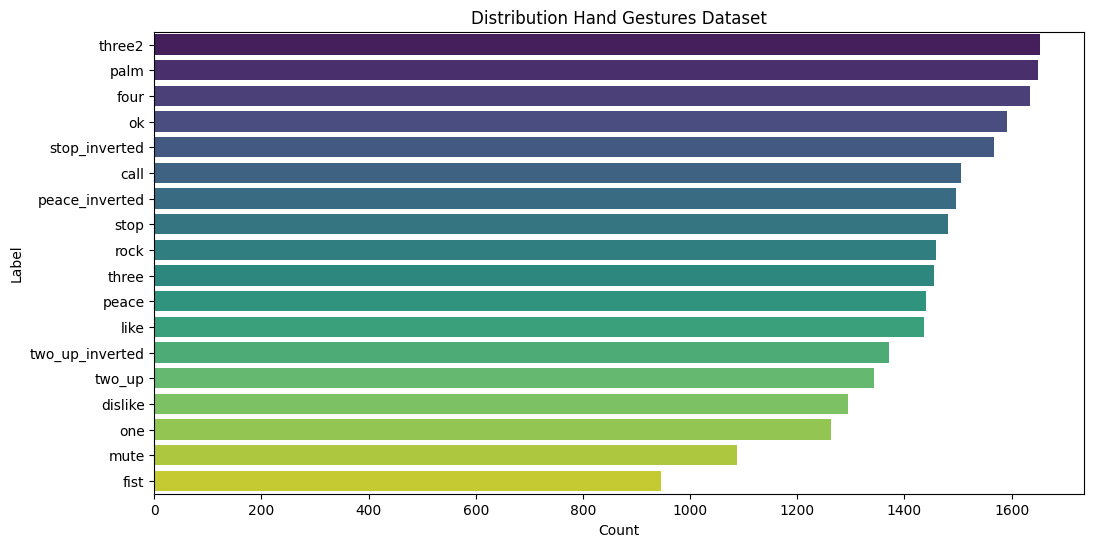

In [13]:
# Visualizing the count of each class
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")
plt.ylabel("Label")
plt.xlabel("Count")
plt.title("Distribution Hand Gestures Dataset")
plt.show()


## Most frequent: three2 – 1653 samples
## Least frequent: fist – 945 samples


In [ ]:
# Visualizing the different classes 
def plot_hand_gesture(df, sample_index):

    sample = df.iloc[sample_index]
    x_coords = [sample[f'x{i}'] for i in range(1, 22)]
    y_coords = [sample[f'y{i}'] for i in range(1, 22)]
    y_coords = np.max(y_coords) - np.array(y_coords)

    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  
        (0, 5), (5, 6), (6, 7), (7, 8),  
        (5, 9), (9, 10), (10, 11), (11, 12),  
        (9, 13), (13, 14), (14, 15), (15, 16), 
        (0, 17), (13, 17), (17, 18), (18, 19), (19, 20)  # Pinky finger
    ]

    plt.figure(figsize=(5, 5))
    plt.scatter(x_coords, y_coords, color='red', label="Keypoints")
    for connection in connections:
        x1, y1 = x_coords[connection[0]], y_coords[connection[0]]
        x2, y2 = x_coords[connection[1]], y_coords[connection[1]]
        plt.plot([x1, x2], [y1, y2], 'b', linewidth=2)

    gesture_label = sample['label']

    # Display plot
    plt.title(f"Hand Gesture: {gesture_label}")
    plt.axis("equal")
    plt.legend()
    plt.show()

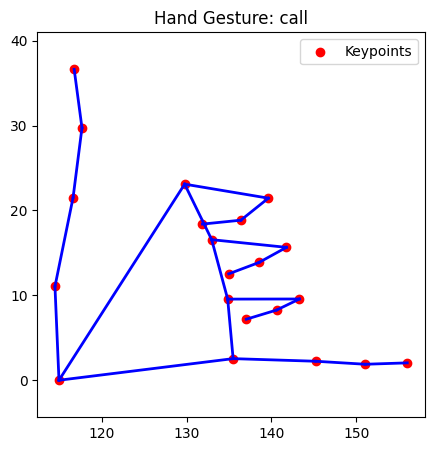

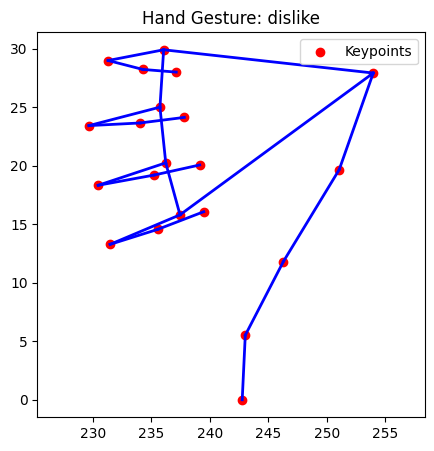

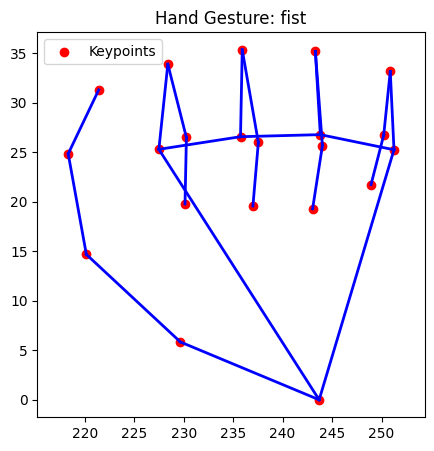

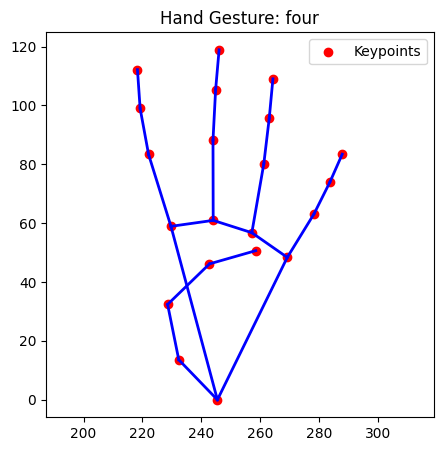

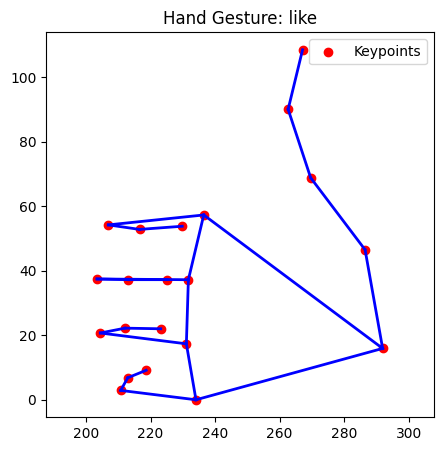

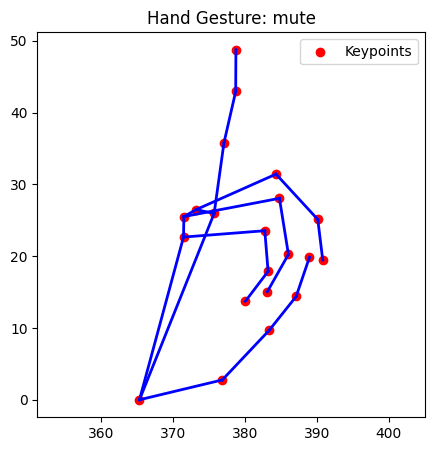

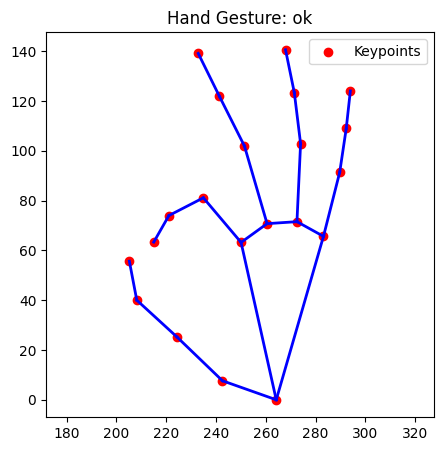

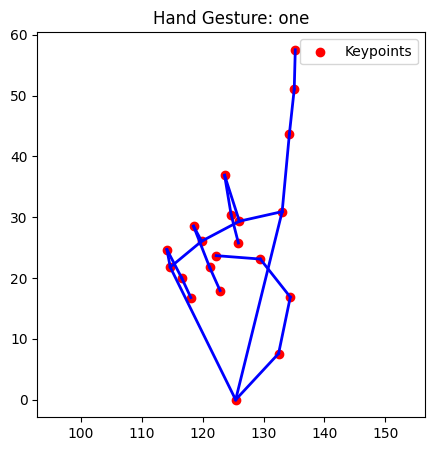

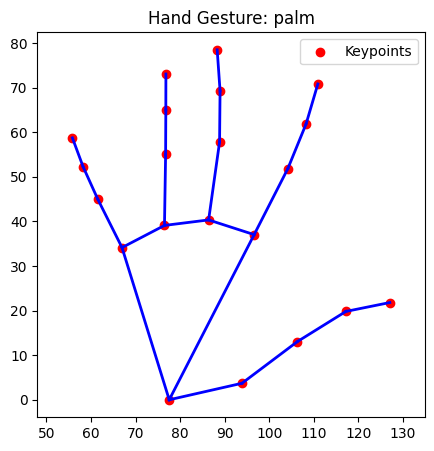

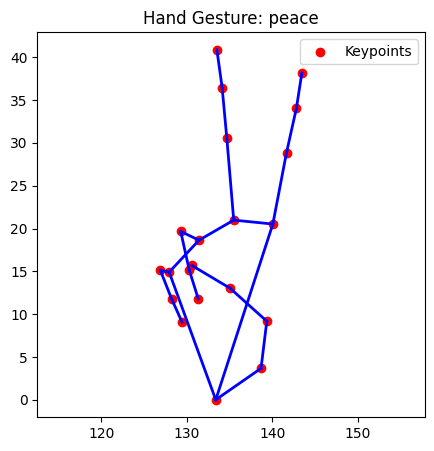

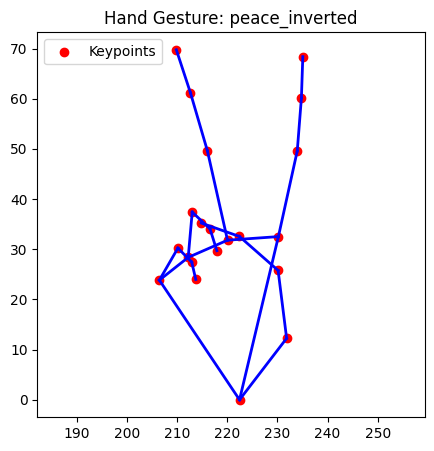

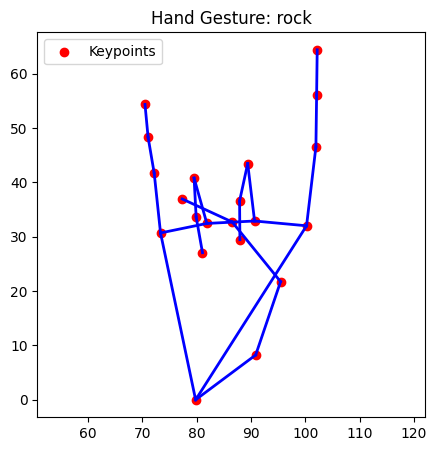

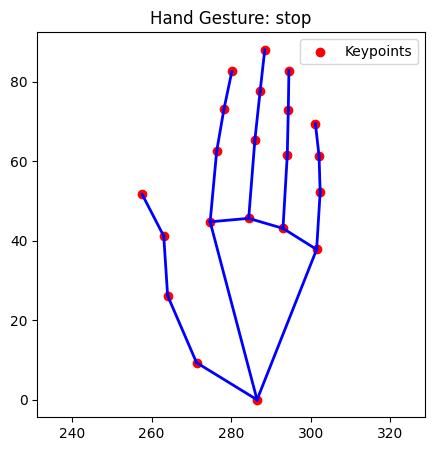

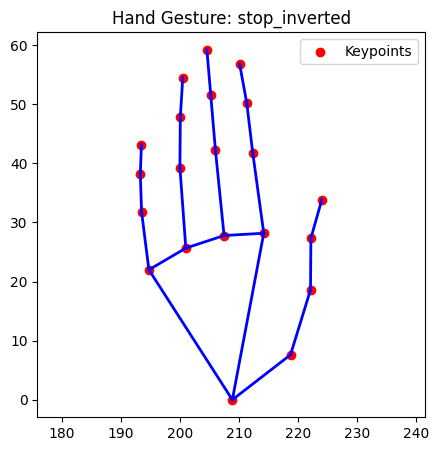

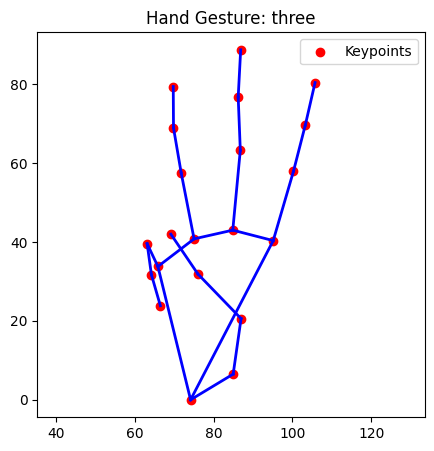

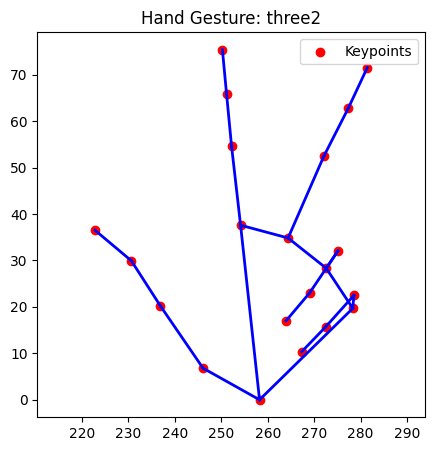

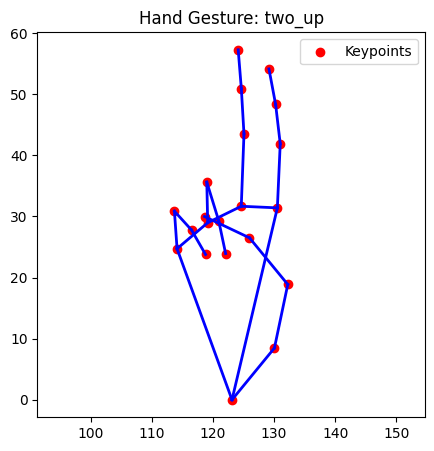

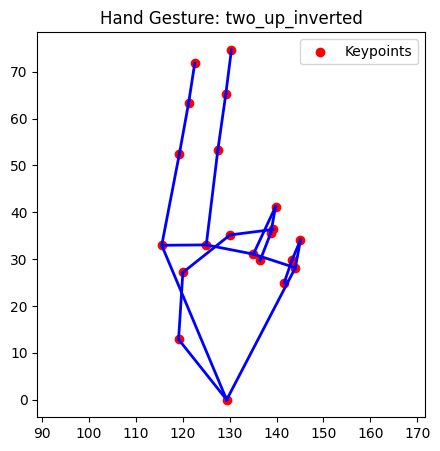

In [ ]:
# Plotting the hand gestures
# Plotting a few samples of each gesture


label_like_df = df[df['label'] == 'like']
plot_hand_gesture(label_like_df, 2)
label_fist_df = df[df['label'] == 'fist']
plot_hand_gesture(label_fist_df, 34)
label_four_df = df[df['label'] == 'four']
plot_hand_gesture(label_four_df, 14)
label_mute_df = df[df['label'] == 'mute']
plot_hand_gesture(label_mute_df, 1)
label_ok_df = df[df['label'] == 'ok']
plot_hand_gesture(label_ok_df, 34)
label_one_df = df[df['label'] == 'one']
plot_hand_gesture(label_one_df, 6)
label_palm_df = df[df['label'] == 'palm']
plot_hand_gesture(label_palm_df, 20)
label_peace_df = df[df['label'] == 'peace']
plot_hand_gesture(label_peace_df, 7)
label_peace_inverted_df = df[df['label'] == 'peace_inverted']
plot_hand_gesture(label_peace_inverted_df, 61)
label_rock_df = df[df['label'] == 'rock']
plot_hand_gesture(label_rock_df, 3)
label_stop_df = df[df['label'] == 'stop']
plot_hand_gesture(label_stop_df, 4)
label_stop_inverted_df = df[df['label'] == 'stop_inverted']
plot_hand_gesture(label_stop_inverted_df, 10)
label_three_df = df[df['label'] == 'three']
plot_hand_gesture(label_three_df, 10)
label_three2_df = df[df['label'] == 'three2']
plot_hand_gesture(label_three2_df, 10)
label_two_up_df = df[df['label'] == 'two_up']
plot_hand_gesture(label_two_up_df, 10)
label_two_up_inverted_df = df[df['label'] == 'two_up_inverted']
plot_hand_gesture(label_two_up_inverted_df, 45)
label_call_df = df[df['label'] == 'call']
plot_hand_gesture(label_call_df, 3)
label_dislike_df = df[df['label'] == 'dislike']
plot_hand_gesture(label_dislike_df, 15)

# Data Preprocessing

In [17]:
# checking for total nulls in the data
print(df.isnull().sum().sum())

0


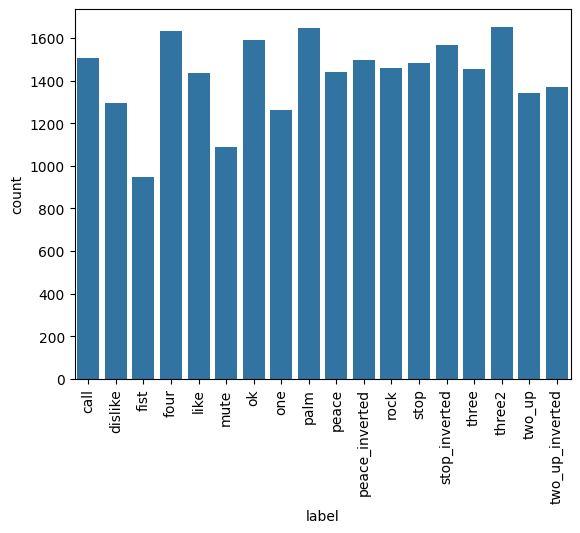

In [18]:
# Checking if the data is balanced or not
sns.countplot(x=df['label'])
plt.xticks(rotation=90)
plt.show()

In [19]:
# Checking for duplicate rows
print(f"Duplicate : {df.duplicated().sum()}")

Duplicate : 0


In [20]:
# Normalizing Hand Landmarks
def preprocess_hand_landmarks(df):
    
    wrist_x, wrist_y = df["x1"], df["y1"]
    mid_x, mid_y = df["x13"], df["y13"]

    df_processed = df.copy()

    for i in range(1,22):  # 21 landmarks (1 to 21)
        df_processed[f"x{i}"] = (df[f"x{i}"] - wrist_x) / (abs(mid_x) + abs(mid_y))
        df_processed[f"y{i}"] = (df[f"y{i}"] - wrist_y) / (abs(mid_x) + abs(mid_y))

    return df_processed

In [21]:
# Applying Normalization on the data
df_preprocessed = preprocess_hand_landmarks(df)
df_preprocessed.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.010549,-0.020478,0.004224,-0.031708,-0.031308,0.005798,-0.052794,...,-0.078983,-0.003644,-0.020450,-0.095657,0.001627,-0.024577,-0.109790,0.004627,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.003218,-0.039459,-0.011102,0.015174,-0.077859,-0.021096,0.027717,...,0.110731,-0.009618,-0.038175,0.134010,-0.007284,-0.037336,0.155791,-0.006863,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.015856,-0.038550,-0.000184,0.040141,-0.075252,-0.009687,0.056924,...,0.128732,0.017222,-0.044068,0.153686,0.022725,-0.040469,0.175431,0.024775,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.001042,-0.024325,-0.002824,0.003656,-0.047383,-0.008911,0.005965,...,0.066556,-0.004926,-0.027622,0.079458,-0.004145,-0.027863,0.090332,-0.004505,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.000814,-0.040861,-0.002884,0.009452,-0.091081,-0.008115,0.011141,...,0.112382,-0.028064,-0.025113,0.136505,-0.032746,-0.024087,0.156538,-0.039290,-0.023486,call


In [22]:
# Splitting Data to features and labels
X = df_preprocessed.drop(columns=['label'])  # Features
y = df_preprocessed['label']  # Labels

In [74]:
# categorical labels -> numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([ 0,  0,  0, ..., 17, 17, 17], dtype=int64)

In [ ]:
# Splitting the Data into 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Normalization (for XGBoost and SVM)
scaler = StandardScaler()

In [27]:
# Random Forest (no normalization) normalization does not affect the performance since its comparing the features with each other
X_train_rf, X_test_rf = X_train.copy(), X_test.copy()

# XGBoost (standardization applied)
X_train_xgb, X_test_xgb = scaler.fit_transform(X_train), scaler.transform(X_test)

# SVM (standardization applied)
X_train_svm, X_test_svm = scaler.fit_transform(X_train), scaler.transform(X_test)

In [28]:
# to be used for the video
import joblib 


y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

# Model Training 

In [29]:
# Random Forest (1st trial)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted')
rec_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest - Accuracy: {acc_rf:.4f}, Precision: {prec_rf:.4f}, Recall: {rec_rf:.4f}, F1-score: {f1_rf:.4f}")

Random Forest - Accuracy: 0.9535, Precision: 0.9540, Recall: 0.9535, F1-score: 0.9536


In [30]:
# XGBoost (1st trial)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_xgb, y_train)
y_pred_xgb = xgb_model.predict(X_test_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
rec_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print(f"XGBoost - Accuracy: {acc_xgb:.4f}, Precision: {prec_xgb:.4f}, Recall: {rec_xgb:.4f}, F1-score: {f1_xgb:.4f}")

XGBoost - Accuracy: 0.9661, Precision: 0.9665, Recall: 0.9661, F1-score: 0.9662


In [31]:
# SVM (1st trial)
svm_model = SVC(kernel="rbf", C=1, gamma="scale")
svm_model.fit(X_train_svm, y_train)
y_pred_svm = svm_model.predict(X_test_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='weighted')
rec_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"SVM - Accuracy: {acc_svm:.4f}, Precision: {prec_svm:.4f}, Recall: {rec_svm:.4f}, F1-score: {f1_svm:.4f}")

SVM - Accuracy: 0.9562, Precision: 0.9576, Recall: 0.9562, F1-score: 0.9564


## Tuning Hyperparameters 

### Logistic regression

In [76]:
import numpy as np
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

# Define Optuna objective function for Logistic Regression
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    penalty = trial.suggest_categorical('penalty', ['l2'])
    
    # Logistic Regression with the hyperparameters from Optuna
    model = LogisticRegression(C=C, penalty=penalty, solver='lbfgs', max_iter=1000)
    
    # Stratified K-Fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1_weighted')
    
    return f1_scores.mean()

# Optuna optimization to find the best hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Best hyperparameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

# Define the Logistic Regression model with the best hyperparameters
log_reg_model = LogisticRegression(C=best_params["C"], penalty=best_params["penalty"], solver='lbfgs', max_iter=1000)



[I 2025-04-05 14:56:33,437] A new study created in memory with name: no-name-b1c99f89-65ac-4b24-b95b-e131995e3a36
C:\Users\hp\AppData\Local\Temp\ipykernel_9420\3420785628.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2025-04-05 14:56:52,736] Trial 0 finished with value: 0.8127473802974677 and parameters: {'C': 3.794170303816707, 'penalty': 'l2'}. Best is trial 0 with value: 0.8127473802974677.
C:\Users\hp\AppData\Local\Temp\ipykernel_9420\3420785628.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
[I 2025-04-05 14:56:53,985] Trial 1 finished with value: 0.250042671752

Best hyperparameters: {'C': 97.48200415960943, 'penalty': 'l2'}


In [77]:
# Train the Logistic Regression model on the whole training set
log_reg_model.fit(X_train, y_train)




C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=97.48200415960943, max_iter=1000)

In [78]:
# After training, evaluate the model on the test set
y_pred_test = log_reg_model.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_test)
prec_log_reg = precision_score(y_test, y_pred_test, average='weighted')
rec_log_reg = recall_score(y_test, y_pred_test, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_test, average='weighted')

print(f"Optimized Logistic Regression - Accuracy: {acc_log_reg:.4f}, Precision: {prec_log_reg:.4f}, Recall: {rec_log_reg:.4f}, F1-score: {f1_log_reg:.4f}")



Optimized Logistic Regression - Accuracy: 0.8960, Precision: 0.8964, Recall: 0.8960, F1-score: 0.8957


In [79]:
# Saving the optimized Logistic Regression model
import pickle
with open("optimized_log_reg.pkl", "wb") as file:
    pickle.dump(log_reg_model, file)

### Random Forest

In [36]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import pickle

# Objective function for Random Forest
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)  # Number of trees
    max_depth = trial.suggest_int('max_depth', 5, 20)  # Max depth of each tree
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)  
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # Maximum features to consider at each split

    # Initialize RandomForest model with suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1  # Use all available cores for training
    )

    
    model.fit(X_train_rf, y_train)
    y_pred = model.predict(X_test_rf)

    # Calculate accuracy and F1 score
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Set user attributes for evaluation
    trial.set_user_attr("accuracy", acc)
    trial.set_user_attr("f1_weighted", f1)

    return f1

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective_rf, n_trials=10,n_jobs=-1)


best_params_rf = study.best_params
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Train Random Forest model with the best parameters from Optuna
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train_rf, y_train)


# Saving the Random Forest Model to be Used Later on 
with open("best_rf_model.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)


[I 2025-04-04 22:23:49,607] A new study created in memory with name: no-name-9069e48c-6d84-4bee-ac1a-92ba5abaa759
[I 2025-04-04 22:24:53,985] Trial 1 finished with value: 0.9185845243474486 and parameters: {'n_estimators': 90, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 17, 'max_features': 'log2'}. Best is trial 1 with value: 0.9185845243474486.
[I 2025-04-04 22:25:12,580] Trial 4 finished with value: 0.6536159774570994 and parameters: {'n_estimators': 197, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9185845243474486.
[I 2025-04-04 22:26:04,431] Trial 7 finished with value: 0.9458879700402317 and parameters: {'n_estimators': 189, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 7 with value: 0.9458879700402317.
[I 2025-04-04 22:26:28,113] Trial 5 finished with value: 0.9037875488184951 and parameters: {'n_estimators': 230, 'max_depth': 11, '

Best Hyperparameters for Random Forest: {'n_estimators': 189, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2'}


In [37]:
# Evaluating Random Forest Optimized Model
y_pred_best_rf = best_rf_model.predict(X_test_rf)
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
prec_best_rf = precision_score(y_test, y_pred_best_rf, average='weighted')
rec_best_rf = recall_score(y_test, y_pred_best_rf, average='weighted')
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')

print(f"Optimized Random Forest - Accuracy: {acc_best_rf:.4f}, Precision: {prec_best_rf:.4f}, Recall: {rec_best_rf:.4f}, F1-score: {f1_best_rf:.4f}")


Optimized Random Forest - Accuracy: 0.9459, Precision: 0.9462, Recall: 0.9459, F1-score: 0.9459


### XGBoost

In [38]:
# Trying Optuna for Hyperparameters Tuning 
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_float('gamma', 0, 1)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    model.fit(X_train_xgb, y_train)
    y_pred = model.predict(X_test_xgb)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    trial.set_user_attr("accuracy", acc)
    trial.set_user_attr("f1_weighted", f1)

    return f1

In [39]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=20)
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2025-04-04 22:38:13,246] A new study created in memory with name: no-name-e3bcdf2c-3cf3-4bf9-a4b7-613309b16bf2
[I 2025-04-04 22:38:31,153] Trial 0 finished with value: 0.971062365879614 and parameters: {'n_estimators': 150, 'learning_rate': 0.19583598933508703, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.2104819951596808, 'subsample': 0.8998896896355628, 'colsample_bytree': 0.9362828181150589}. Best is trial 0 with value: 0.971062365879614.
[I 2025-04-04 22:39:00,340] Trial 1 finished with value: 0.9729839230393125 and parameters: {'n_estimators': 151, 'learning_rate': 0.15646357701702826, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.057267898654016824, 'subsample': 0.6420781185964451, 'colsample_bytree': 0.7186288521717279}. Best is trial 1 with value: 0.9729839230393125.
[I 2025-04-04 22:39:24,050] Trial 2 finished with value: 0.9704603540823333 and parameters: {'n_estimators': 156, 'learning_rate': 0.12305531932284017, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.

Best Hyperparameters: {'n_estimators': 215, 'learning_rate': 0.08841623144188555, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.0008638197074893883, 'subsample': 0.805055498908115, 'colsample_bytree': 0.8010101478767488}


In [40]:
# Train XGBoost model with the best parameters (from optuna Hyperparameters Tuning)
best_xgb_model = XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train_xgb, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8010101478767488, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.0008638197074893883, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08841623144188555, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=215, n_jobs=None,
              num_parallel_tree=None, ...)

In [41]:
# Evaluating XGBoost Optimized Model
y_pred_best = best_xgb_model.predict(X_test_xgb)
acc_best = accuracy_score(y_test, y_pred_best)
prec_best = precision_score(y_test, y_pred_best, average='weighted')
rec_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Optimized XGboost - Accuracy: {acc_best:.4f}, Precision: {prec_best:.4f}, Recall: {rec_best:.4f}, F1-score: {f1_best:.4f}")

Optimized XGboost - Accuracy: 0.9733, Precision: 0.9736, Recall: 0.9733, F1-score: 0.9734


In [42]:
# Saving the XGBoost Model to be Used Later
with open("best_xgb_model.pkl", "wb") as file:
    pickle.dump(best_xgb_model, file)

### SVM

================================

In [ ]:
# Optuna for Hyperparameters Tuning 
def objective_svm(trial):
    C = trial.suggest_float("C", 1e-3, 1e2)
    gamma = trial.suggest_float("gamma", 1e-4, 1e1)
    kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])

    svm_model = SVC(kernel=kernel, C=C, gamma=gamma)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(svm_model, X_train_svm, y_train, cv=skf, scoring=make_scorer(f1_score, average="weighted"))

    return f1.mean()

In [46]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_svm, n_trials=10, n_jobs=-1)
best_params = study.best_params
print("Best hyperparameters:", best_params)

[I 2025-04-04 23:37:27,798] A new study created in memory with name: no-name-dc63dda7-b291-4910-9159-5d09cd34c339
[I 2025-04-04 23:39:01,450] Trial 5 finished with value: 0.8814534291104816 and parameters: {'C': 0.04250952164560927, 'gamma': 4.562599547352322, 'kernel': 'linear'}. Best is trial 5 with value: 0.8814534291104816.
[I 2025-04-04 23:39:51,512] Trial 4 finished with value: 0.9585758450777201 and parameters: {'C': 10.273079611831573, 'gamma': 2.902254412252294, 'kernel': 'poly'}. Best is trial 4 with value: 0.9585758450777201.
[I 2025-04-04 23:40:08,842] Trial 8 finished with value: 0.9323163236671718 and parameters: {'C': 2.7237480664329774, 'gamma': 8.183981423206829, 'kernel': 'linear'}. Best is trial 4 with value: 0.9585758450777201.
[I 2025-04-04 23:41:24,539] Trial 0 finished with value: 0.9551860281104059 and parameters: {'C': 51.59720476352099, 'gamma': 7.2166370698395195, 'kernel': 'linear'}. Best is trial 4 with value: 0.9585758450777201.
[I 2025-04-04 23:41:32,228]

Best hyperparameters: {'C': 10.273079611831573, 'gamma': 2.902254412252294, 'kernel': 'poly'}


In [47]:
# Using the Best Hyperparameters for SVM
optimized_svm = SVC(**best_params)
optimized_svm.fit(X_train_svm, y_train)

y_pred_optimized = optimized_svm.predict(X_test_svm)
# Evaluating the Optimized SVM Model
acc_svm = accuracy_score(y_test, y_pred_optimized)
prec_svm = precision_score(y_test, y_pred_optimized, average='weighted')
rec_svm = recall_score(y_test, y_pred_optimized, average='weighted')
f1_svm = f1_score(y_test, y_pred_optimized, average='weighted')

print(f"Optimized SVM-Accuracy: {acc_svm:.4f}, Precision: {prec_svm:.4f}, Recall: {rec_svm:.4f}, F1-score: {f1_svm:.4f}")


Optimized SVM-Accuracy: 0.9616, Precision: 0.9618, Recall: 0.9616, F1-score: 0.9617


In [48]:

# Saving the SVM Model to be Used Later
import pickle
with open("optimized_svm_.pkl", "wb") as file:
    pickle.dump(optimized_svm, file)

In [ ]:
# Evaluating the Models
model_names = {
    "best_rf_model.pkl": "Random Forest",
    "optimized_svm_.pkl": "SVM",
    "best_xgb_model.pkl": "XGBoost"
}

results = []

def load_and_evaluate_model(model_path, X_test, y_test):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    model_name = model_names.get(model_path, model_path)
    results.append([model_name, f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}"])


the best one is the SVM since it has the highst F1score 

# video handlling part 

In [53]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib

In [55]:
# Loading the trained model, and the data to be used in classification
model = joblib.load("best_xgb_model.pkl")
scaler = joblib.load("scaler.pkl") 
label_encoder = joblib.load("label_encoder.pkl") 

In [56]:
# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
# Create a Hands object for hand detection and tracking
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
# Initialize the drawing utility to visualize hand landmarks
mp_drawing = mp.solutions.drawing_utils

In [57]:
# Mapping for inverting the encoded labels
gesture_names = [
    "call", "dislike", "fist", "four", "like", "mute", "ok", "one", "palm", "peace", 
    "peace_inverted", "rock", "stop", "stop_inverted", "three", "three2", "two_up", "two_up_inverted"
]

In [65]:
# handelling the input video
video_path = "Input_Video.mov"  

cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

fps = int(cap.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter("output_vid.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))


In [66]:
def PreprocessHandLandmarks(landmarks):
   
    df = pd.DataFrame([landmarks], columns=[f"{axis}{i}" for i in range(1, 22) for axis in ['x', 'y', 'z']])
    
    
    wrist_x, wrist_y = df["x1"], df["y1"]
    mid_x, mid_y = df["x13"], df["y13"]

    # Normalize all landmarks
    for i in range(1, 22):  
        df[f"x{i}"] = (df[f"x{i}"] - wrist_x) / (abs(mid_x) + abs(mid_y))
        df[f"y{i}"] = (df[f"y{i}"] - wrist_y) / (abs(mid_x) + abs(mid_y))

    # Scale features
    return scaler.transform(df)

In [67]:
def annotate_frame(frame, hand_landmarks, prediction_label):
    mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    cv2.putText(frame, f"Gesture : {prediction_label}", (50, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3,
                lineType=cv2.LINE_AA)

In [68]:
def extract_landmarks(hand_landmarks):
    return [coord 
            for landmark in hand_landmarks.landmark 
            for coord in (landmark.x, landmark.y, landmark.z)]

In [69]:
def process_frame(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            landmarks = extract_landmarks(hand_landmarks)
            processed_features = PreprocessHandLandmarks(landmarks)
            prediction_prob = model.predict_proba(processed_features)[0]
            predicted_index = np.argmax(prediction_prob)
            predicted_label = gesture_names[predicted_index]

            annotate_frame(frame, hand_landmarks, predicted_label)

    return frame

In [70]:
# Main loop
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    processed_frame = process_frame(frame)
    out.write(processed_frame)

    cv2.imshow("Gesture Recognition", processed_frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

# Conclusion

Conclusion
In this project, we implemented three machine learning models for hand gesture classification: Random Forest, XGBoost, and SVM. We optimized the hyperparameters of each model using Optuna to achieve better performance. Below are the evaluation metrics for each model after optimization:

## 1-Optimized Random Forest

Accuracy: 0.9459

Precision: 0.9462

Recall: 0.9459

F1-score: 0.9459

## 2- Optimized XGBoost

Accuracy: 0.9733

Precision: 0.9736

Recall: 0.9733

F1-score: 0.9734

## 3- Optimized SVM

Accuracy: 0.9616

Precision: 0.9618

Recall: 0.9616

F1-score: 0.9617

## 4- Logistic Regression

Accuracy: 0.8960

Precision: 0.8964

Recall: 0.8960

F1-score: 0.8957

## ==============================================
Best Performing Model
Based on the evaluation metrics, the Optimized XGBoost model outperformed the other models with the highest accuracy, precision, recall, and F1-score. The optimized XGBoost achieved:

Accuracy: 0.9733

Precision: 0.9736

Recall: 0.9733

F1-score: 0.9734

This makes XGBoost the best performing model for hand gesture classification in this project.